# Peak Detection

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tatsuki-washimi/gwexpy/blob/main/docs/web/en/user_guide/tutorials/advanced_peak_detection.ipynb)

`gwexpy` provides the `find_peaks` method for easily detecting peaks in signals contained in `TimeSeries` or `FrequencySeries`. This internally wraps `scipy.signal.find_peaks`, but allows intuitive parameter specification using physical units (Hz, seconds, etc.).

The `find_peaks` method returns the following two items:
- **Peak Series**: A new Series object containing only the peak points
- **Properties**: A dictionary of peak properties (such as prominence and width) returned by scipy

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u

from gwexpy import FrequencySeries, TimeSeries

## 1. Peak Detection in FrequencySeries

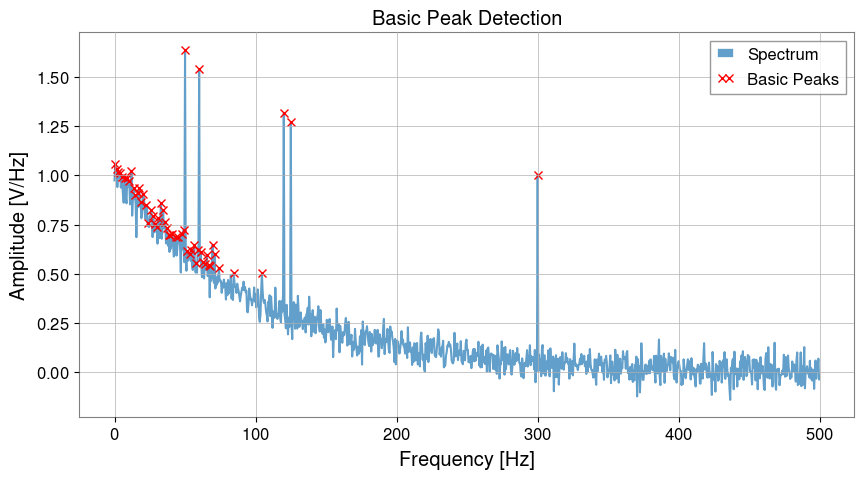

In [2]:
# Create mock data
df = 0.5 * u.Hz
f_axis = np.arange(0, 500, df.value) * u.Hz
data = np.exp(-f_axis.value / 100) + np.random.normal(0, 0.05, len(f_axis))

# Add peaks
peak_freqs_true = [50, 60, 120, 125, 300] * u.Hz
for f in peak_freqs_true:
    idx = int(f.value / df.value)
    data[idx] += 1.0

spec = FrequencySeries(data, df=df, unit="V/Hz")

# --- Basic detection (threshold only) ---
# peaks is returned as a FrequencySeries object
peaks, _ = spec.find_peaks(threshold=0.5)

plt.figure(figsize=(10, 5))
plt.plot(spec, label="Spectrum", alpha=0.7)
plt.plot(peaks, "x", color="red", label="Basic Peaks")
plt.title("Basic Peak Detection")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [V/Hz]")
plt.legend()
plt.show()

## 2. Constraints Using Physical Units (Distance & Width)

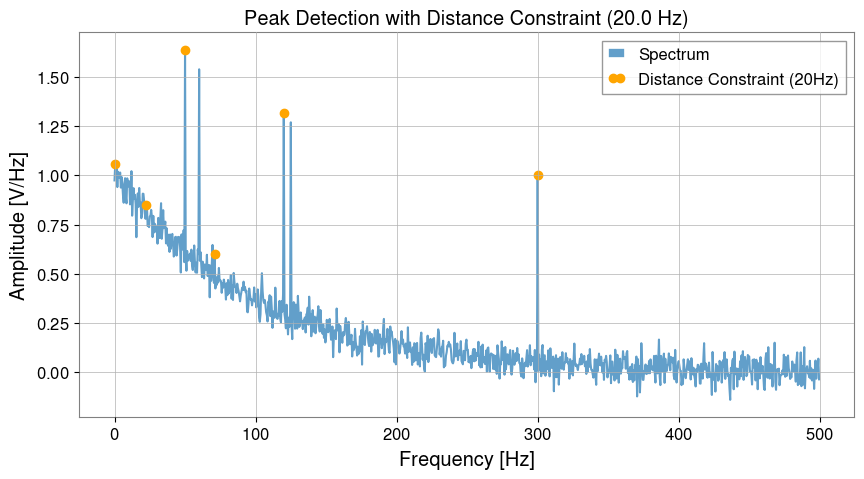

Detected peaks: [  0.5  22.5  50.   71.  120.  300. ] Hz


In [3]:
dist_constraint = 20 * u.Hz
peaks_adv, props = spec.find_peaks(threshold=0.5, distance=dist_constraint)

plt.figure(figsize=(10, 5))
plt.plot(spec, label="Spectrum", alpha=0.7)
plt.plot(peaks_adv, "o", color="orange", label="Distance Constraint (20Hz)")
plt.title(f"Peak Detection with Distance Constraint ({dist_constraint})")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [V/Hz]")
plt.legend()
plt.show()

print(f"Detected peaks: {peaks_adv.frequencies}")

## 3. Peak Detection in TimeSeries

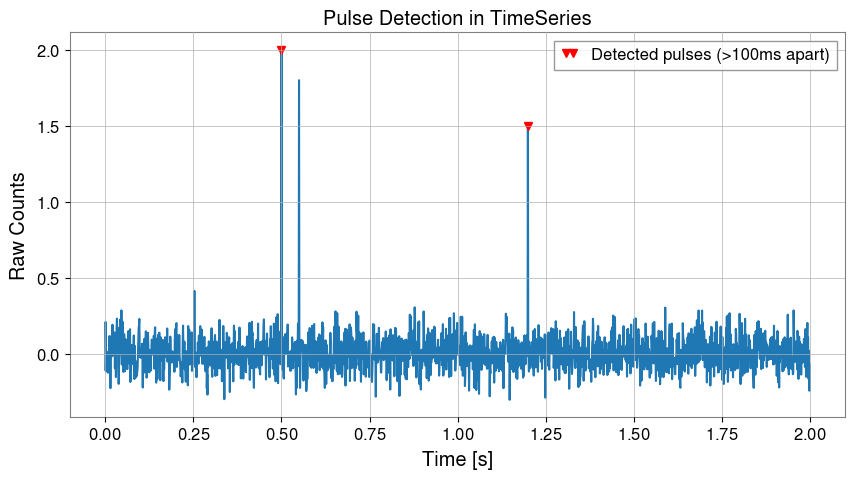

In [4]:
fs = 1024.0
t = np.arange(0, 2.0, 1 / fs)
ts_data = np.random.normal(0, 0.1, len(t))

# Add pulses
ts_data[int(0.5 * fs)] = 2.0
ts_data[int(0.55 * fs)] = 1.8
ts_data[int(1.2 * fs)] = 1.5

ts = TimeSeries(ts_data, sample_rate=fs, unit="counts")

# Ignore consecutive pulses within 0.1 seconds
peaks_t, _ = ts.find_peaks(height=0.5, distance=0.1 * u.s)

plt.figure(figsize=(10, 5))
plt.plot(ts)
plt.plot(peaks_t, "v", color="red", label="Detected pulses (>100ms apart)")
plt.title("Pulse Detection in TimeSeries")
plt.xlabel("Time [s]")
plt.ylabel("Raw Counts")
plt.legend()
plt.show()